In [1]:
import pandas as pd
import numpy as np
df_new=pd.read_csv("state_esti_2_new.csv")
df=pd.read_csv("new_state_1.csv")

In [2]:
X=df
y=df_new["curr_reward"]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv',index=False)
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
X_val=pd.read_csv('X_val.csv')
y_val=pd.read_csv('y_val.csv')

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU,Activation
model = Sequential()
n_features = X.shape[1]
model.add(Dense(1, input_dim=n_features, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
# Train the model with input and output data
history=model.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_val, y_val))

Metal device set to: Apple M1
Epoch 1/100


2023-03-15 12:45:13.376982: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-15 12:45:13.377083: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-15 12:45:13.477139: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-15 12:45:13.578618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


548/553 [============================>.] - ETA: 0s - loss: 1.5291 - mae: 0.9446

2023-03-15 12:45:15.934262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


553/553 [==============================] - 4s 7ms/step - loss: 1.5249 - mae: 0.9432 - val_loss: 1.0980 - val_mae: 0.8034
Epoch 2/100
553/553 [==============================] - 4s 7ms/step - loss: 0.8619 - mae: 0.7016 - val_loss: 0.6882 - val_mae: 0.6232
Epoch 3/100
553/553 [==============================] - 4s 7ms/step - loss: 0.6037 - mae: 0.5734 - val_loss: 0.5403 - val_mae: 0.5359
Epoch 4/100
553/553 [==============================] - 4s 7ms/step - loss: 0.5209 - mae: 0.5187 - val_loss: 0.4960 - val_mae: 0.5033
Epoch 5/100
553/553 [==============================] - 4s 6ms/step - loss: 0.4968 - mae: 0.5002 - val_loss: 0.4812 - val_mae: 0.4914
Epoch 6/100
553/553 [==============================] - 4s 7ms/step - loss: 0.4870 - mae: 0.4924 - val_loss: 0.4733 - val_mae: 0.4877
Epoch 7/100
553/553 [==============================] - 4s 7ms/step - loss: 0.4816 - mae: 0.4901 - val_loss: 0.4693 - val_mae: 0.4831
Epoch 8/100
553/553 [==============================] - 4s 7ms/step - loss: 0.4786

553/553 [==============================] - 4s 7ms/step - loss: 0.4754 - mae: 0.4852 - val_loss: 0.4660 - val_mae: 0.4849
Epoch 63/100
553/553 [==============================] - 4s 7ms/step - loss: 0.4755 - mae: 0.4861 - val_loss: 0.4656 - val_mae: 0.4832
Epoch 64/100
553/553 [==============================] - 4s 7ms/step - loss: 0.4755 - mae: 0.4860 - val_loss: 0.4659 - val_mae: 0.4831
Epoch 65/100
553/553 [==============================] - 4s 7ms/step - loss: 0.4753 - mae: 0.4860 - val_loss: 0.4663 - val_mae: 0.4819
Epoch 66/100
553/553 [==============================] - 4s 7ms/step - loss: 0.4756 - mae: 0.4860 - val_loss: 0.4660 - val_mae: 0.4816
Epoch 67/100
553/553 [==============================] - 4s 7ms/step - loss: 0.4755 - mae: 0.4857 - val_loss: 0.4656 - val_mae: 0.4827
Epoch 68/100
553/553 [==============================] - 4s 7ms/step - loss: 0.4756 - mae: 0.4860 - val_loss: 0.4658 - val_mae: 0.4815
Epoch 69/100
553/553 [==============================] - 4s 7ms/step - loss:

In [5]:
from tensorflow.keras.models import save_model
save_model(model, 'model_reward.h5')

In [6]:
mse, mae = model.evaluate(X_test, y_test)

645/645 [==============================] - 2s 3ms/step - loss: 0.4631 - mae: 0.4813


In [7]:
y_pred=model.predict(X_test)

130/645 [=====>........................] - ETA: 0s

2023-03-15 12:51:38.475194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


645/645 [==============================] - 1s 1ms/step


In [8]:
import numpy as np
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 value:', r2)


R2 value: 0.5319292971855425


In [9]:
def adjusted_r_squared(y_test, y_pred, n, k):
    r_squared = r2_score(y_test, y_pred)
    return 1 - ((1 - r_squared) * (n - 1)) / (n - k - 1)
n = len(y_test)
k = 5
adj_r_squared = adjusted_r_squared(y_test, y_pred, n, k)
print(adj_r_squared)



0.5318158475023744


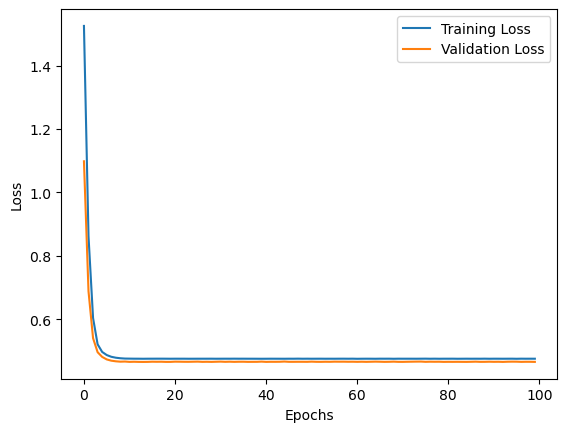

In [10]:
# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()